In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, mean_absolute_error, mean_squared_error, classification_report, roc_curve, RocCurveDisplay, auc, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, roc_auc_score, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('../DATA/scaled_data.csv', index_col=False)
x = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

In [3]:
pca_models = dict()
pca_res = dict()
for i in range(2, data.shape[1]):
    pca_models[i] = PCA(n_components=i).fit(x, y)
    pca_res[i] = pca_models[i].transform(x)


In [4]:
def metrics_dict(yp, yt):
    return {'accuracy_score': accuracy_score(yp, yt), 
            'f1_score': f1_score(yp, yt, average='micro'),
            'f1_score_macro': f1_score(yp, yt, average='macro'),
            'recall_score': recall_score(yp, yt, average='micro'),
            'recall_score_macro': recall_score(yp, yt, average='macro'),
            'precision_score': precision_score(yp, yt, average='micro'),
            'precision_score_macro': precision_score(yp, yt, average='macro')
            }


In [5]:
knns = dict()
knns_metrics = dict()
knns_results = dict()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
lab = LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)
for i in range(2, data.shape[1]):
    knns[i] = KNeighborsClassifier(n_neighbors=5).fit(pca_models[i].transform(X_train), y_train)
    knns_results[i] = knns[i].predict(pca_models[i].transform(X_test))


In [6]:
for i in range(2, data.shape[1]):
    knns_metrics[i] = metrics_dict(knns_results[i], y_test)


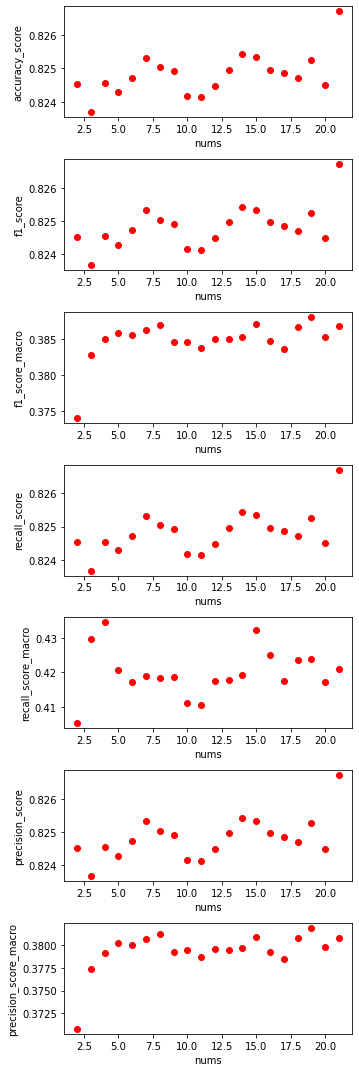

In [10]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(5)
gs = gridspec.GridSpec(len(knns_metrics[2]), 1)
for j, k in zip(range(len(knns_metrics[2])), knns_metrics[2]):
    x = list(range(2, data.shape[1]))
    y = []
    for i in range(2, data.shape[1]):
        y.append(knns_metrics[i][k])
    ax = fig.add_subplot(gs[j, 0])
    ax.scatter(x, y, c='red')
    ax.set_xlabel('nums')
    ax.set_ylabel(k)

